### Impoting Modules
Let us begin by importing the modules


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Loading the data
Load the prices data from Qualcomm_Stocks.txt file.

In [2]:
file_name = r'C:\Users\ritthaku\Desktop\AIML\Qualcomm_Stocks.txt'

In [3]:
Stock_qualcomm = pd.read_csv(r'C:\Users\ritthaku\Desktop\AIML\Qualcomm_Stocks.txt')

In [4]:
Stock_qualcomm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-01-02,25.485001,26.025000,24.885000,26.025000,17.366922,18612800
1,2002-01-03,26.030001,26.670000,25.825001,25.990000,17.343565,22240000
2,2002-01-04,26.235001,26.290001,24.895000,25.205000,16.819725,38927400
3,2002-01-07,25.200001,25.209999,23.549999,23.600000,15.748687,40064600
4,2002-01-08,23.424999,24.290001,23.230000,24.094999,16.079002,56385400


### Explore the data

Let us explore the data.

Let us use describe() to view statistical-details about the data.

Also, let us see if there are any null values in each column of the data using isnull().sum().

Note:

describe() is a method used on a data frame to view the statistical description of the numerical columns in the data frame.

isnull() method returns True in the places where there are null values(or missing values) and False if the values are not nulls.

isnull().sum() displays column-wise information about the number of nulls found in each column of the data frame.

In [5]:
Stock_qualcomm.shape

(5234, 7)

In [6]:
Stock_qualcomm.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5.234000e+03
mean,60.192165,60.951975,59.433002,60.200651,50.010987,1.546658e+07
std,33.457699,33.924632,32.958895,33.434639,35.349908,9.819482e+06
min,12.075000,12.765000,11.605000,11.875000,7.924388,2.120200e+06
25%,39.820000,40.304999,39.179998,39.825000,27.864374,9.146925e+06
50%,53.445000,53.960001,52.865000,53.419998,42.253382,1.301650e+07
75%,68.199997,68.830002,67.487499,68.269997,56.399760,1.882850e+07
max,190.300003,193.580002,185.190002,189.279999,186.460327,1.560193e+08


In [7]:
Stock_qualcomm.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Setting the Index for the Data Frame

Since we are dealing with time-series data, it makes sense to see the date column as the index of our data frame.

let us first convert the "date" column into DateTime type using the pd.to_datetime() method of pandas.

Note:

pd.to_datetime() is used to covert the type of column to datetime type.

set_index() method is used to set the data frame index using existing columns.

In [8]:
Stock_qualcomm['Date']= pd.to_datetime(Stock_qualcomm['Date'])

In [9]:
print(Stock_qualcomm.Date.dtype)

datetime64[ns]


In [10]:
Stock_qualcomm=Stock_qualcomm.set_index("Date")

In [11]:
Stock_qualcomm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,25.485001,26.025000,24.885000,26.025000,17.366922,18612800
2002-01-03,26.030001,26.670000,25.825001,25.990000,17.343565,22240000
2002-01-04,26.235001,26.290001,24.895000,25.205000,16.819725,38927400
2002-01-07,25.200001,25.209999,23.549999,23.600000,15.748687,40064600
2002-01-08,23.424999,24.290001,23.230000,24.094999,16.079002,56385400


In [12]:
print(Stock_qualcomm.shape)

(5234, 6)


In [13]:
yahoo_data = Stock_qualcomm.asfreq('b')

In [14]:
print(Stock_qualcomm.shape)

(5234, 6)


In [15]:
Stock_qualcomm.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-10,120.589996,121.040001,113.449997,114.599998,114.599998,9512600
2022-10-11,112.000000,112.489998,108.650002,110.029999,110.029999,10758800
2022-10-12,110.320000,110.800003,108.379997,108.639999,108.639999,6987900
2022-10-13,105.379997,115.199997,104.660004,112.860001,112.860001,10455000
2022-10-14,114.629997,114.989998,109.790001,109.949997,109.949997,7989800


In [16]:
Stock_qualcomm.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [17]:
Stock_qualcomm.isnull().any(axis=1)

Date
2002-01-02    False
2002-01-03    False
2002-01-04    False
2002-01-07    False
2002-01-08    False
              ...  
2022-10-10    False
2022-10-11    False
2022-10-12    False
2022-10-13    False
2022-10-14    False
Length: 5234, dtype: bool

### Visualizing Data
Now, let us have a look at how the closing values of data look like.

Below defined is the plotter function which extracts the close values, reshapes the data into columnar data, and uses that to plots the data.

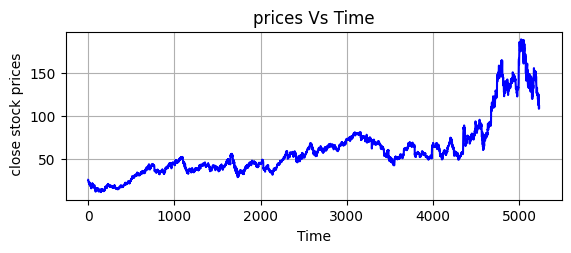

In [18]:
def plotter():
    global closing_stock
    plt.subplot(211)
    company_close = Stock_qualcomm
    company_close = company_close.Close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel(" close stock prices")
    plt.title('prices Vs Time')
    plt.grid(True)
    plt.plot(company_close , 'b')
    plt.show()

plotter()

### Feature Scaling
Let us have a look at the minimum and maximum values of the closing prices using min() and max() respectively.

Let us then use MinMaxScaler, a module from sklearn library to scale the values into the range of 0 and 1.

In [19]:
print(closing_stock.min())
print(closing_stock.max())

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

stocks = scaler.fit_transform(closing_stock)

print(stocks.min())
print(stocks.max())

11.875
189.28
0.0
1.0


### Splitting the Data
Let us split the stocks into 3 parts, for training, validation, and testing purposes.

Let us have 80% of the data in the train set, 10% in the validation set and the remaining 10% in the test set.

In [20]:
n_train = int(len(closing_stock) * 0.80)
n_remaining = len(closing_stock) - n_train

n_val = int(n_remaining*0.50)
n_test = n_remaining - n_val 
print("Train samples:",n_train, "Validation Samples:",n_val,"Test Samples:", n_test)

train_data = closing_stock[0:n_train]
print(train_data.shape)

val_data = closing_stock[n_train:n_train+n_val]
print(val_data.shape)

test_data = closing_stock[n_train+n_val:]
print(test_data.shape)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

train = scaler.fit_transform(train_data)
val = scaler.transform(val_data)
test = scaler.transform(test_data)

Train samples: 4187 Validation Samples: 523 Test Samples: 524
(4187, 1)
(523, 1)
(524, 1)


### Creating the Dataset
In this exercise, we are going to use GRU, which is one of the quite useful deep learning algorithms to deal with time-series data.

It expects the input data to be three-dimensional. The first dimension indicates the batch size, the second dimension is the timestamps and the third dimension is the number of features.

Let us feed 2 values to predict the next value. To create the data set, let us define the create_dataset function.

In the function, we will be traversing till the last third row of the dataset, combine every two consecutive values as one input, and put the third value as the value to be predicted(ground truth of prediction).

In [21]:
def create_dataset(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)
n_features = 2

In [22]:
trainX, trainY = create_dataset(train, n_features)
valX, valY = create_dataset(val, n_features)
testX, testY = create_dataset(test, n_features)

print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(4184, 2) (4184,) (520, 2) (520,) (521, 2) (521,)


In [23]:
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
valX = valX.reshape(valX.shape[0] , 1 ,valX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(4184, 1, 2) (4184,) (520, 1, 2) (520,) (521, 1, 2) (521,)


### Building the Model
Finally, we have reached the modeling part.

As discussed previously, we shall use a GRU based model.

Firstly, let us import the necessary TensorFlow and Scikit-Learn libraries.

Next, we shall build the model by adding layers, compiling it, and then fitting the model on the train data.

A bit about the model we are going to build:

The model we are going to use is a stacked GRU.
So the output of one GRU layer should act as the input to the next GRU layer stacked above the former one and so on.
We have already discussed that the GRU/LSTM layers in Keras expect the input to be in three-dimensional.
Thus, we have to make sure that the output from a previous layer is formatted in a three-dimensional way so as to provide it as input to the next layer.
This job could be achieved by setting return_sequences=True in the GRU layers whose output would potentially act as the input to the next GRU layer.

In [24]:
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [25]:
model=keras.Sequential()

In [26]:
# First GRU layer
model.add(layers.GRU(units=100, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Second GRU layer
model.add(layers.GRU(units=150, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Third GRU layer
model.add(layers.GRU(units=100, activation='tanh'))
model.add(layers.Dropout(0.2))

# The output layer
model.add(layers.Dense(units=1, kernel_initializer='he_uniform', activation='linear'))

Observe the argument return_sequences, which is set to be True only for those layers which have a GRU layer after them(that is, the first and second GRU layers), unlike the third layer. This is so because the output of the third layer would be fed to a Dense layer but not a GRU/LSTM layer.

In [27]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate = 0.0005) , metrics = ['mean_squared_error'])

Let us now see the summary of the model architecture.

In [28]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 100)            31200     
                                                                 
 dropout (Dropout)           (None, 1, 100)            0         
                                                                 
 gru_1 (GRU)                 (None, 1, 150)            113400    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 gru_2 (GRU)                 (None, 100)               75600     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

In [29]:
history = model.fit(trainX,trainY,epochs=100,batch_size=128, verbose=1, validation_data = (valX,valY))

Epoch 1/100
33/33 [==============================] - 4s 29ms/step - loss: 0.1124 - mean_squared_error: 0.1124 - val_loss: 0.0079 - val_mean_squared_error: 0.0079
Epoch 2/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 3/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 4/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 5/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 6/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 7/100
33/33 [==============

33/33 [==============================] - 0s 7ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 52/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 53/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 54/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 55/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 56/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 57/100
33/33 [=====================

### Evaluating the Model Performance
Let us now compute the model score on train data, validation data, and test data.

We shall use the model.evaluate() and print the Mean Squared Error and Root Mean Squared Error for each of the train, validation and test sets.

In [30]:
import math

def model_score(model, X_train, y_train, X_val, y_val , X_test, y_test):
    print('Train Score:')
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format(train_score[0], math.sqrt(train_score[0])))

    print('Validation Score:')
    val_score = model.evaluate(X_val, y_val, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (val_score[0], math.sqrt(val_score[0])))

    print('Test Score:')
    test_score = model.evaluate(X_test, y_test, verbose=0)
    print("MSE: {:.5f} , RMSE: {:.2f}".format (test_score[0], math.sqrt(test_score[0])))


model_score(model, trainX, trainY ,valX, valY , testX, testY)

Train Score:
MSE: 0.00026 , RMSE: 0.02
Validation Score:
MSE: 0.00142 , RMSE: 0.04
Test Score:
MSE: 0.02870 , RMSE: 0.17


### Visualizing Loss vs Epochs
Now that we have built the model, let us visualize how the model loss varies with respect to the epoch for the train data and validation data using matplotlib.

Firstly, let us have a look at the history, where all the history about various parameters like loss, mean_squared_error, and validation mean_squared_error are stored when the model was fit on train data and validated on validation data.

Since we aim to plot the training loss an validation loss behavior with respect to the number of epochs, let us use those corresponding values from history.history dictionary.

loss represents the training loss and val_loss indicates the validation loss.

Let us plot the training loss and validation loss. We shall also set the title, ylabel, xlabel, and legend for the plot and finally show it.

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


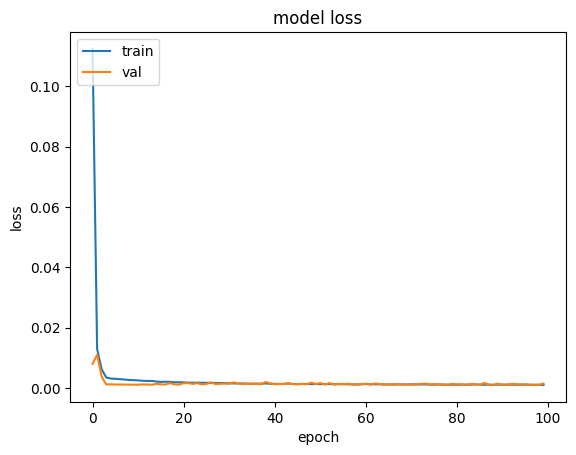

In [33]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Visualizing Predictions vs Ground Truths
Let us now plot the predicted stock prices vs the actual ground truth values.

We shall use model.predict() to get the predicted values of the test data set.

Since we have scaled the actual values of the dataset, we need to inverse transform the values. So, inverse transform the predicted values using scaler.inverse_transform() and pass the pred as an argument.

17/17 [==============================] - 0s 1ms/step
[[107.93338 ]
 [108.18853 ]
 [109.75421 ]
 [107.6841  ]
 [108.36646 ]
 [110.28604 ]
 [113.474846]
 [113.29379 ]
 [113.3446  ]
 [114.692764]]
[[111.91999]
 [113.81999]
 [110.57   ]
 [112.19   ]
 [114.5    ]
 [118.47   ]
 [117.37999]
 [117.68   ]
 [119.52   ]
 [115.47   ]]


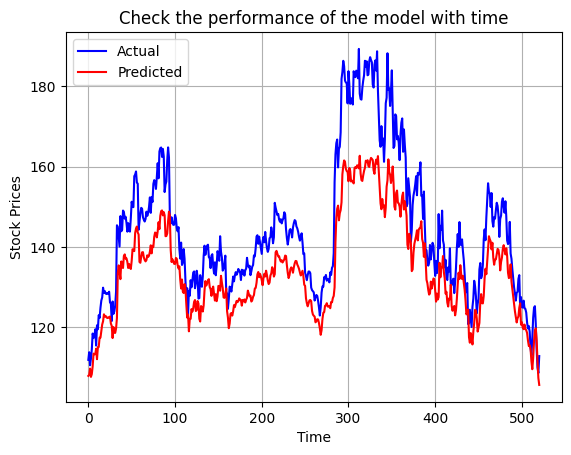

In [34]:
pred = model.predict(testX)
pred = scaler.inverse_transform(pred)
print(pred[:10])

testY_actual = testY.reshape(testY.shape[0] , 1)
testY_actual = scaler.inverse_transform(testY_actual)
print(testY_actual[:10])

plt.plot(testY_actual , 'b')
plt.plot(pred , 'r')

plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the performance of the model with time')
plt.legend(['Actual', 'Predicted'], loc='upper left')

plt.grid(True)
plt.show()